How many articles would you like to scrape?  5


Article Titles
---
1  .  Live updates: Trump defeats Haley in New Hampshire GOP primary | CNN Politics  : Sentiment Analyis-  Good news!
---
2  .  Live updates: Israel-Hamas war rages as Gaza death toll rises | CNN  : Sentiment Analyis-  Neutral
---
3  .  Biden is ready to turn the page toward a face-off with Trump. His path to reelection won’t be an easy one. | CNN Politics  : Sentiment Analyis-  Neutral
---
4  .  Opinion: Donald Trump wins against Nikki Haley, but loses it | CNN  : Sentiment Analyis-  Neutral
---
5  .  Five takeaways from the New Hampshire primary | CNN Politics  : Sentiment Analyis-  Neutral
Mean =  7467.8
Median =  4162
The overall sentiment of all articles is neutral


[nltk_data] Downloading package stopwords to /Users/casey/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


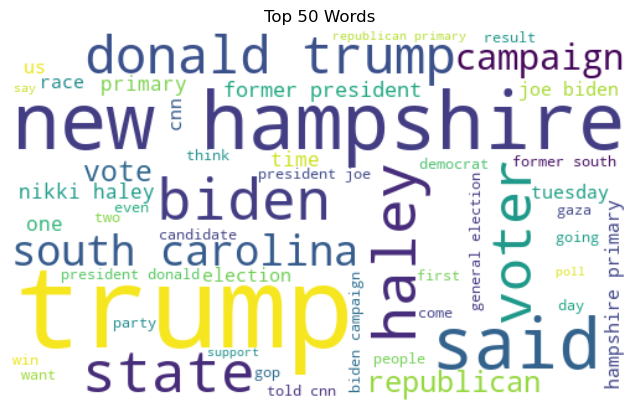

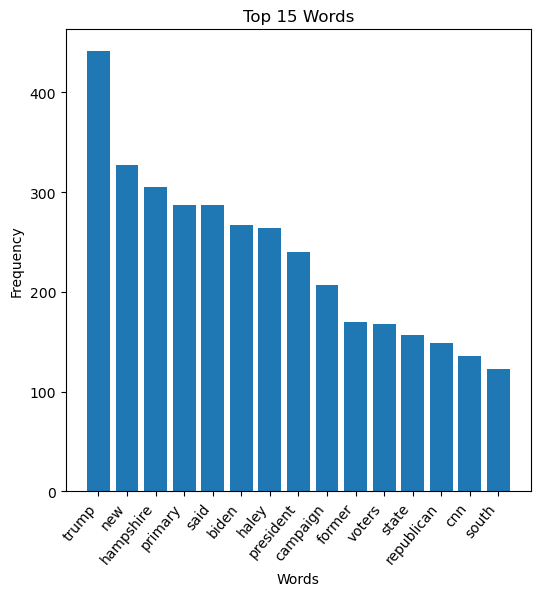

In [2]:
#Casey Cruz Web Scraper
#to use this you must install beautiful soup, lxml, textblob
#do this in the terminal (mac) or command prompt (win)
#do, pip install beautifulsoup4, pip install lxml, and pip install textblob
#you also needed to download english.txt from 
#https://www.kaggle.com/datasets/heeraldedhia/stop-words-in-28-languages?resource=download&select=english.txt
#you can also make a txt file in jupiter lab with all of the same words

import requests
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

# get html text from url
initialSite = "https://www.cnn.com"
getHTML = requests.get(initialSite)
siteHTML = getHTML.text

#find articles from link
allArticles = re.findall(r'<a href="(/[^"]+)"', siteHTML)
topArticles = []
for newArticle in allArticles:
    if newArticle not in topArticles and "video" not in newArticle:
        topArticles.append(newArticle)

#user input
while True:
    numInput = int(input("How many articles would you like to scrape? "))      
    topArticles = topArticles[:numInput]
    if numInput < len(allArticles) and numInput > 0:
        break
    else:
        print("Enter a valid number")
       
#store titles, # of words each article, and list of all words
titles = []
wordCount = []
wordList = []
sentimentAnalysis = []

for articleLink in topArticles:
    #Titles
    if "live-news" in articleLink:
        articleURL = f"{initialSite}/{articleLink}"
    else:
        articleURL = f"{initialSite}{articleLink}"

    txt = requests.get(articleURL)
    articleHTML = txt.text
    
    #find the title of the specific article
    findTitle = re.search(r'<title>(.*?)</title>', articleHTML)
    if findTitle:
        title = findTitle.group(1)
        titles.append(title)
    else:
        titles.append("Missing")
    
    #Get words from articles
    articletext = requests.get(articleURL)
    articleHTML = articletext.text
    soup = BeautifulSoup(articleHTML, 'html.parser')
    paragraphs = soup.find_all('p')
    
    articleWords = []
    for paragraph in paragraphs:
        #could just look through and identify where spaces are
        pWords = re.findall(r'\b\w+\b', paragraph.get_text())
        pWords = [word.lower() for word in pWords]
        wordList.extend(pWords)
        articleWords.extend(pWords)
 
    numWords = len(articleWords)
    wordCount.append(numWords)
    
    #sentiment analysis of article
    toAnalyze = ' '.join(articleWords)
    analysis = TextBlob(toAnalyze)
    score = analysis.sentiment.polarity
    
    if score > 0.1:
        sentimentAnalysis.append("Good news!")
    elif score < -0.1:
        sentimentAnalysis.append("Bad news!")
    else:
        sentimentAnalysis.append("Neutral")
    
    
print("Article Titles")
for x in range(len(titles)):
    print("---")
    print((x+1), " . ", titles[x], " : Sentiment Analyis- ",sentimentAnalysis[x])

#calculate mean/median of words, & overall sentiment
#mean
totalSum = 0
for num in range(len(wordCount)):
    totalSum += wordCount[num]
    
mean = totalSum/len(wordCount)
print("Mean = ", mean)

#median
median = 0
wordCount.sort()
listSize = len(wordCount)
if listSize % 2 == 0:
    medL = wordCount[listSize // 2 - 1]
    medR = wordCount[listSize // 2]
    median = (medL + medR) / 2
else:
    median = wordCount[listSize // 2]
print("Median = ", median)

#sentiment
sent = "None"
good = sentimentAnalysis.count("Good News!")
bad = sentimentAnalysis.count("Bad News!")
neut = sentimentAnalysis.count("Neutral")

if good > bad and good >= nuet:
    sent = "good"
elif bad > good and bad >= neut:
    sent = "bad"
else:
    sent = "neutral"
    
print("The overall sentiment of all articles is", sent)

#word cloud & bar chart
#removing stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filteredWords = [word.lower() for word in wordList if word.lower() not in stop_words]

#wordlist
wordcloud = WordCloud(width=500, height=300, max_words=50, background_color='white').generate(' '.join(filteredWords))
    
#Word Cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 50 Words")
plt.show()

#count occurence of each word
word_frequency = Counter(filteredWords)
top15frequent = word_frequency.most_common(15)
#( {"word", freq} )
#unpack list of tuples to words and numbers to plot 
wrds, freq = zip(*top15frequent)

#Bar Chart
plt.figure(figsize=(6, 6))
plt.bar(wrds, freq)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 15 Words")
#no overlap
plt.xticks(rotation=50, ha='right')
plt.show()